# Marketing Analytics Project 

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import re
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)


# Data Exploration

We have a relatively clean dataset used from --> https://www.kaggle.com/datasets/jackdaoud/marketing-data

In [2]:
df = pd.read_csv("ifood_df.csv")

In [3]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [5]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [6]:
#Dropping some of the redundant features
to_drop = ["Z_CostContact", "Z_Revenue"]
df = df.drop(to_drop, axis=1)

In [7]:
categorical_columns = [ col for col in df.columns if 
re.match("^.*(Kidhome|Teenhome|Accepted|Complain|Response|marital|education).*$", col)]

In [8]:
numerical_columns = [col for col in df.columns if col not in categorical_columns]

In [9]:
len(df.columns)

37

In [10]:
# check for nulls
df.isnull().sum().sort_values(ascending=False)

Income                  0
AcceptedCmp2            0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
Complain                0
AcceptedCmp1            0
Kidhome                 0
AcceptedCmp5            0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmpOverall      0
dtype: int64

# Feature Engineering


In [11]:
df["TotalSpending"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df["Children"] = df["Kidhome"] + df["Teenhome"]
df["FamilySize"] = df["marital_Divorced"] + df["marital_Married"] + df["marital_Single"] + df["marital_Together"] + df["marital_Widow"] + df["Children"]
df["TotalPromos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

<Figure size 576x396 with 0 Axes>

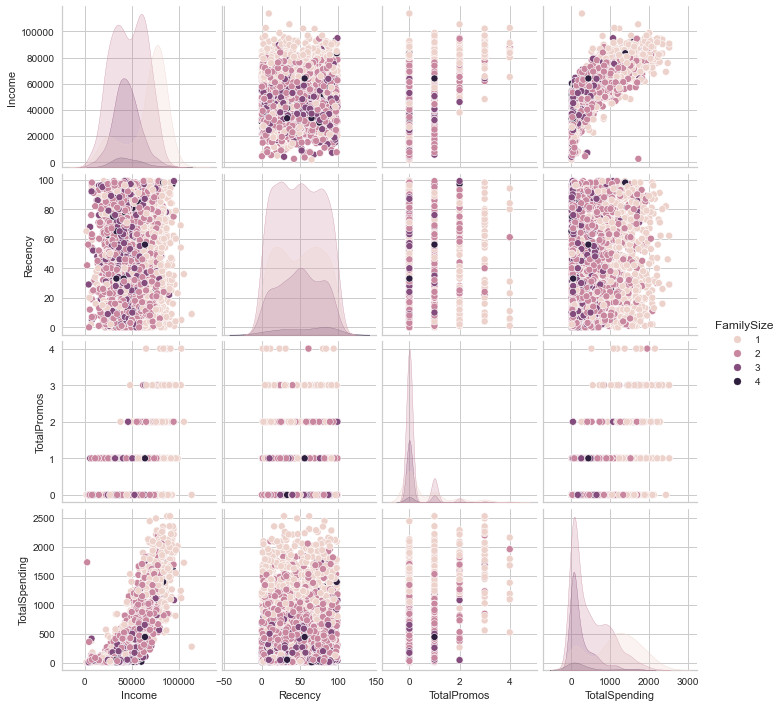

In [12]:
to_plot = [ "Income", "Recency", "TotalPromos", "TotalSpending", "FamilySize"]
plt.figure()
sns.pairplot(df[to_plot], hue= "FamilySize")
plt.show()

C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\priya\AppData\Local\Temp\ipykernel_29588\576836423.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,4))


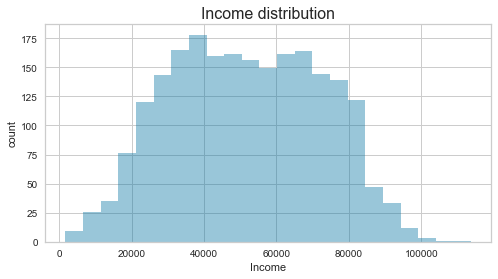

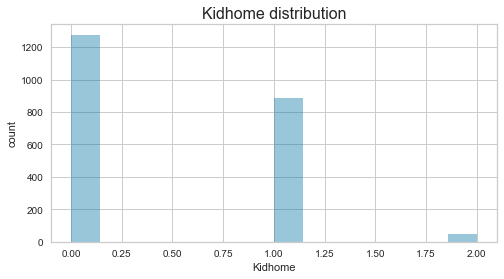

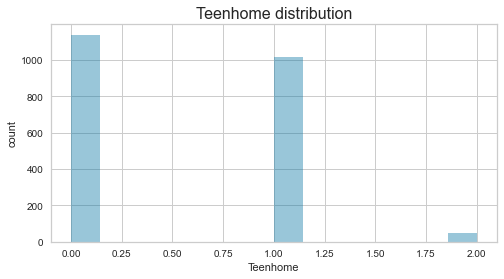

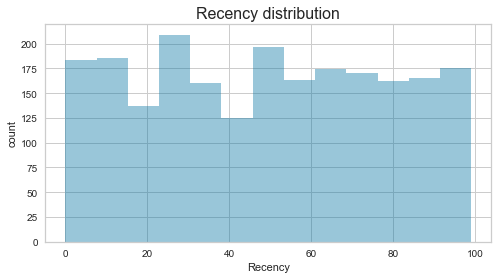

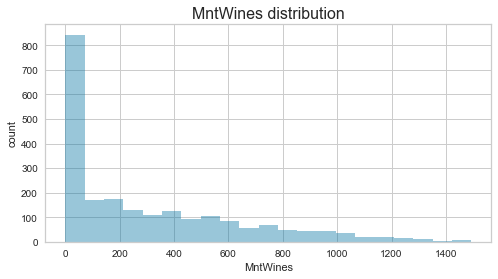

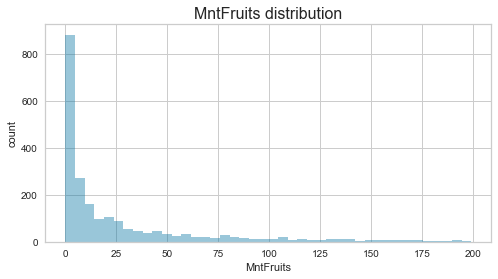

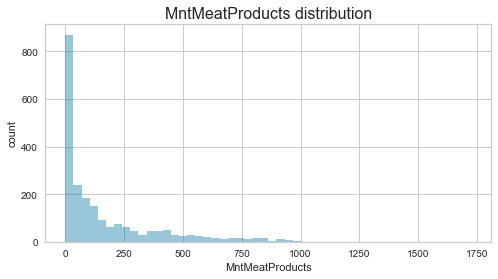

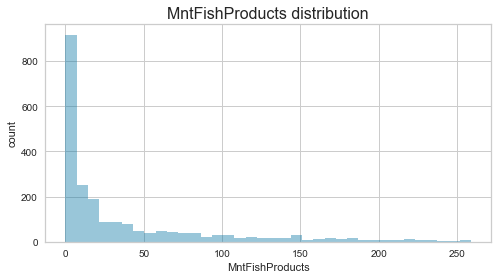

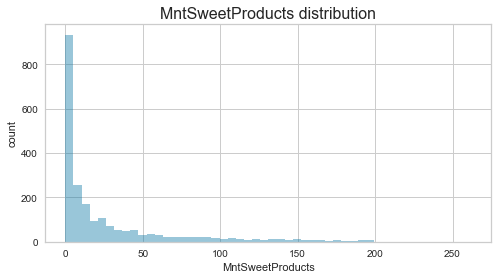

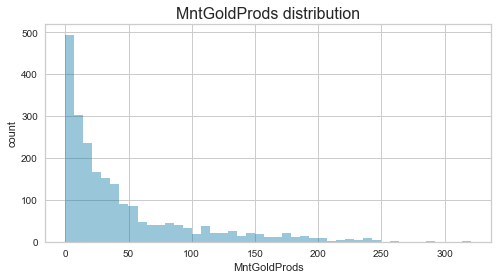

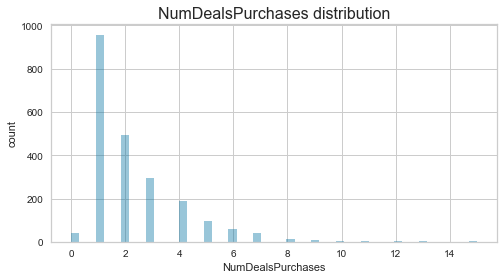

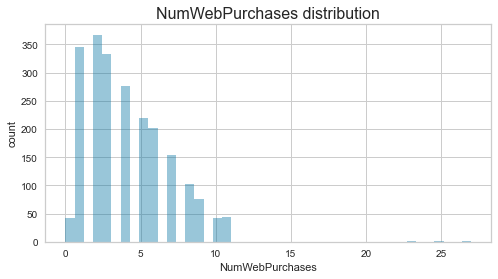

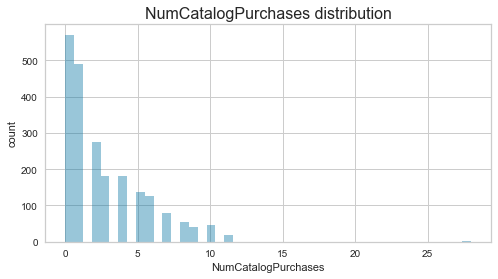

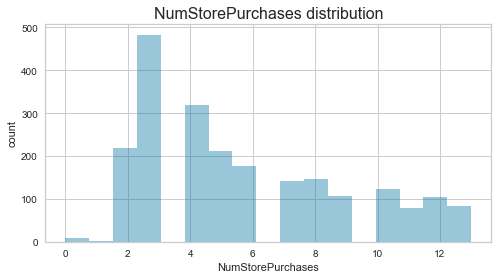

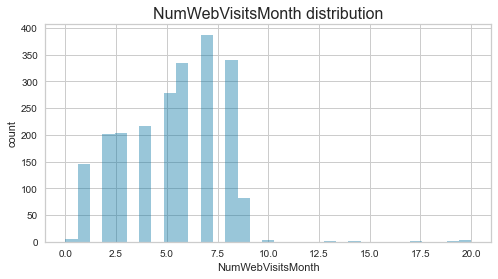

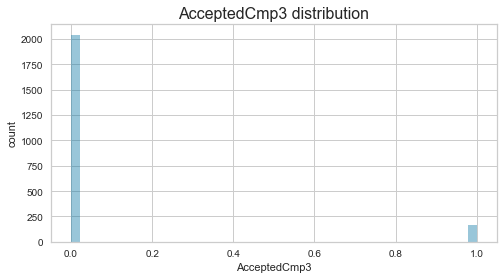

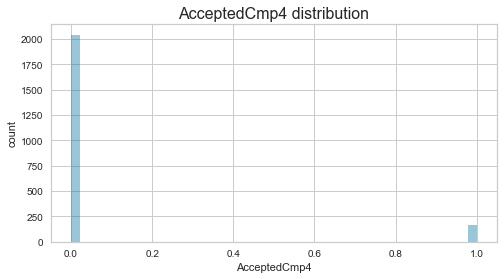

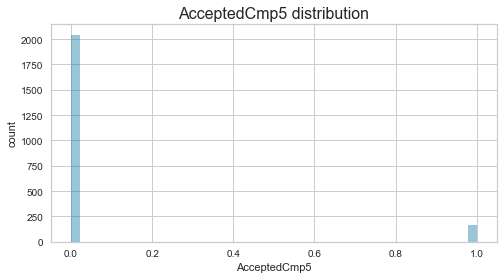

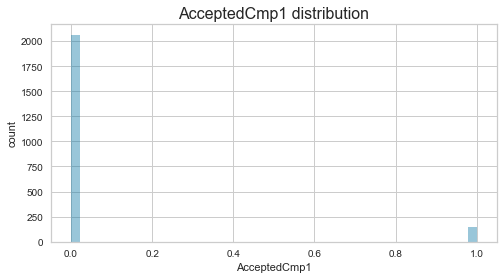

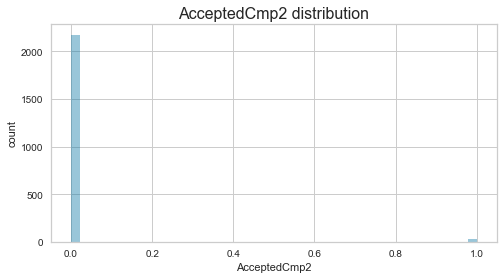

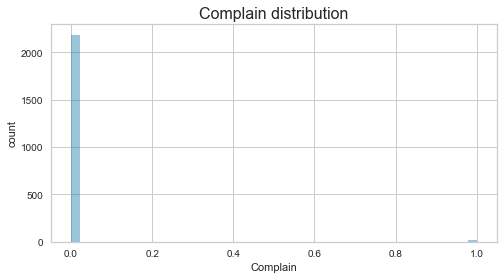

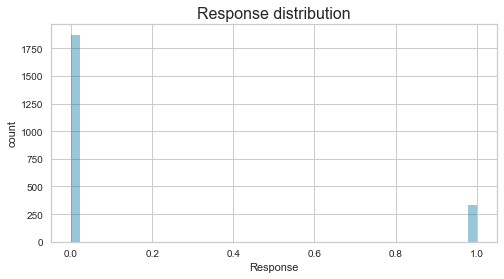

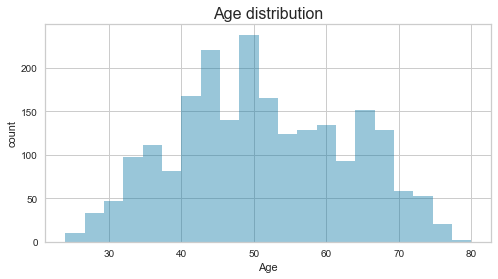

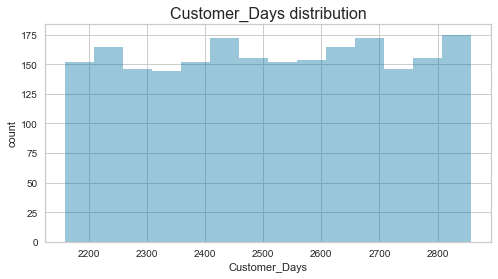

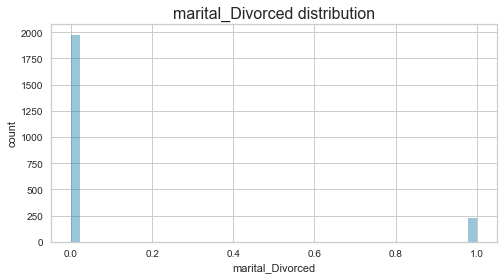

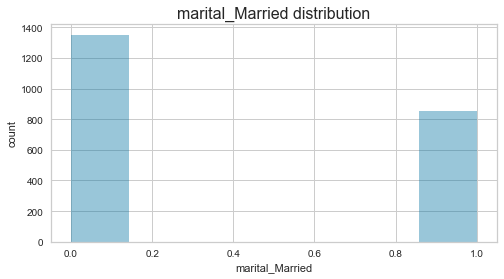

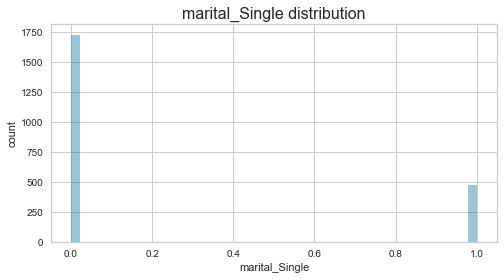

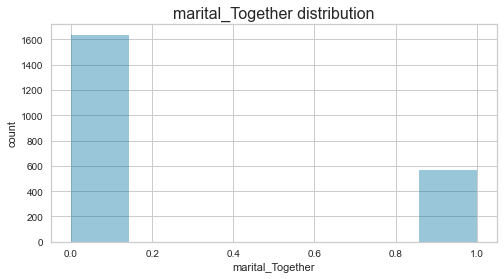

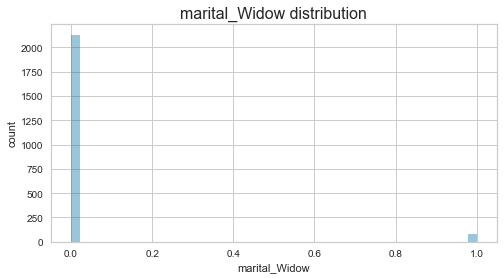

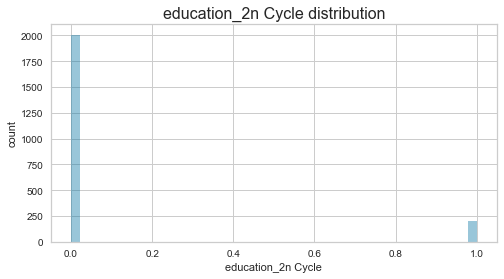

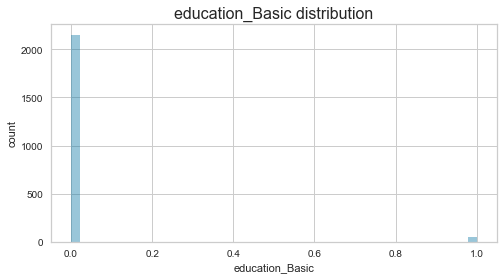

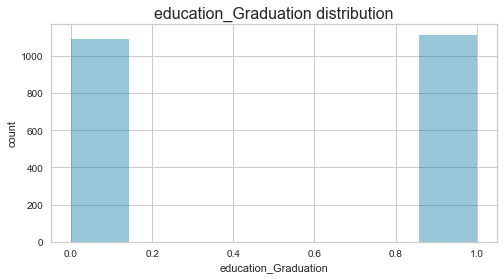

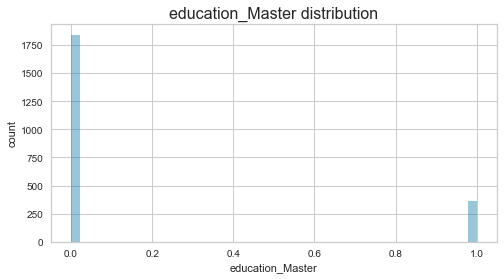

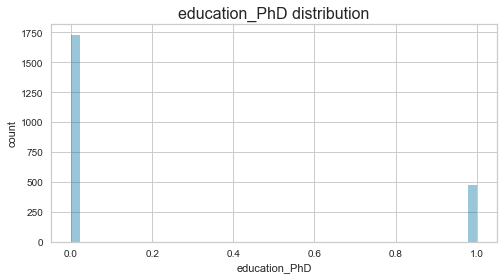

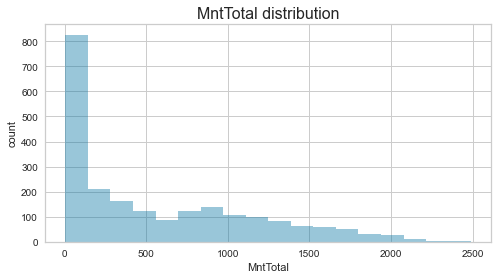

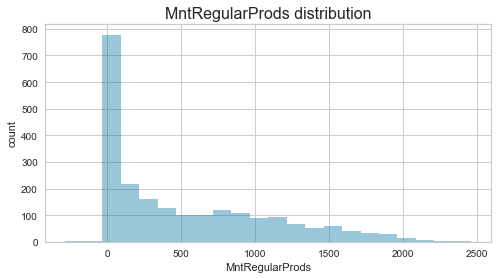

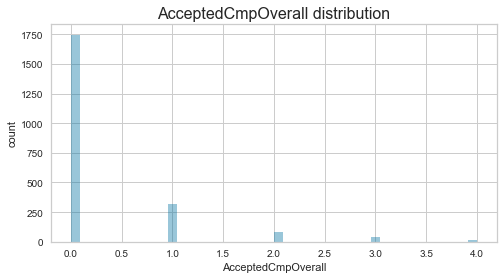

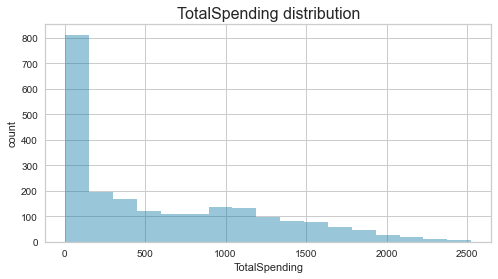

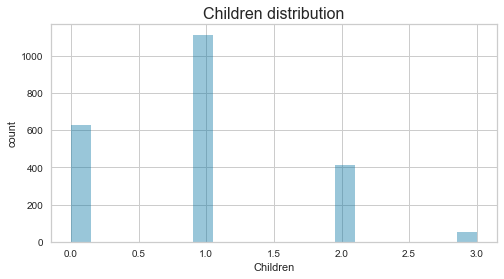

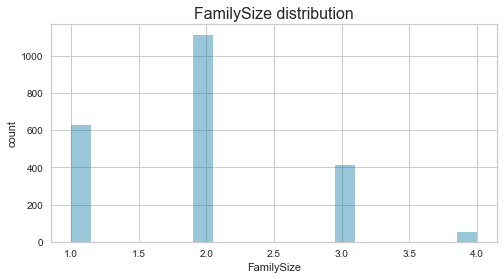

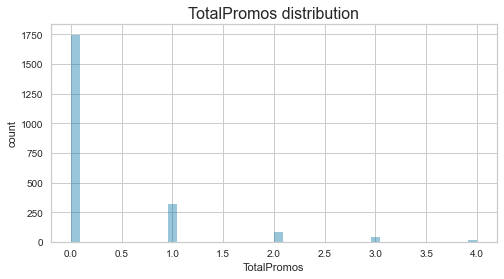

In [13]:
# Frequency Distribution of all the variables

for i in df.columns.tolist():
    plt.figure(figsize=(8,4))
    sns.distplot(df[i], kde=False, hist=True)
    plt.title(str(i) + ' distribution', size=16)
    plt.ylabel('count')

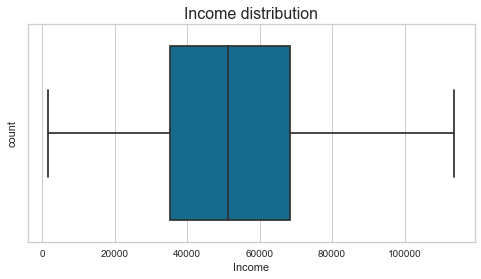

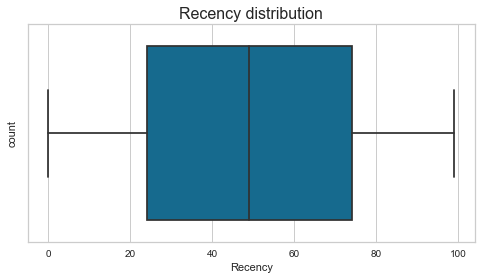

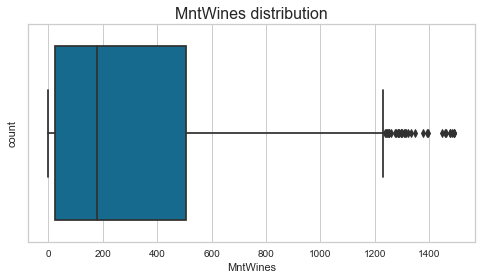

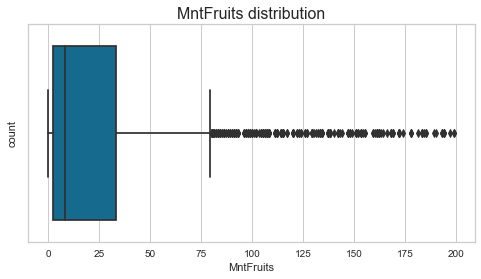

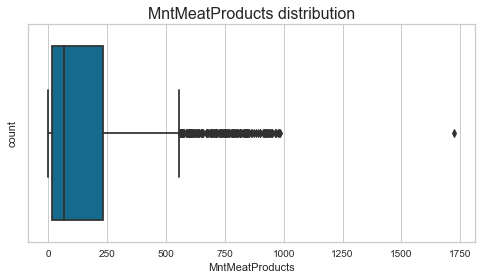

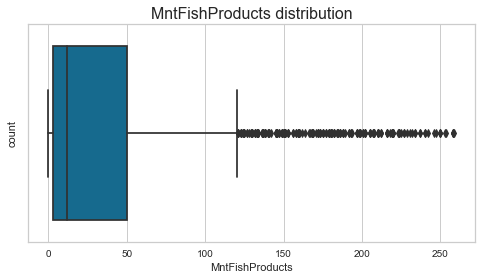

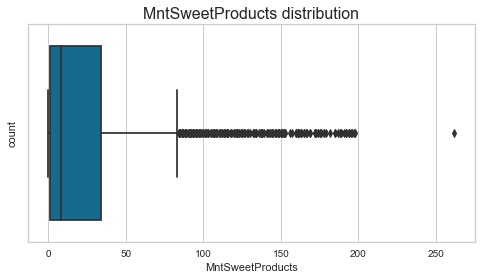

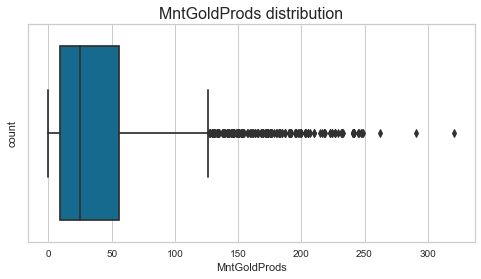

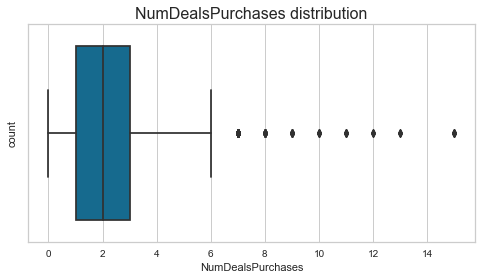

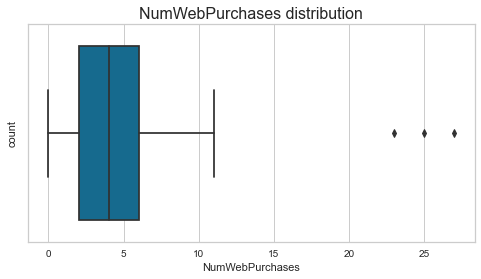

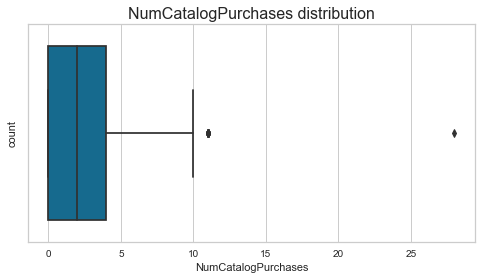

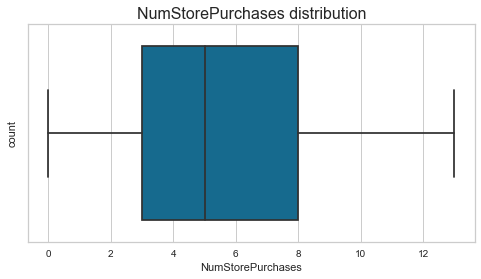

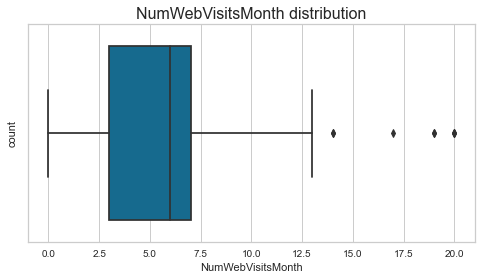

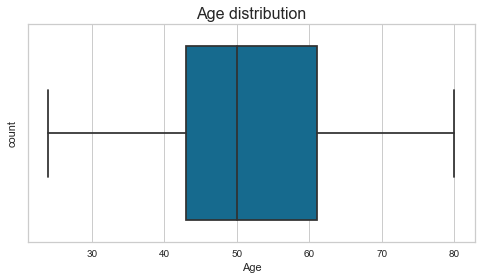

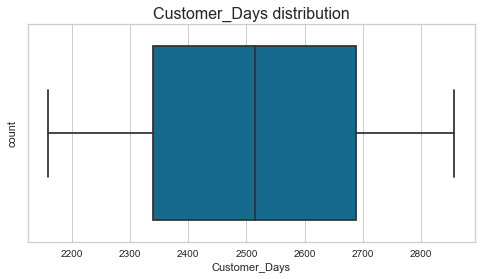

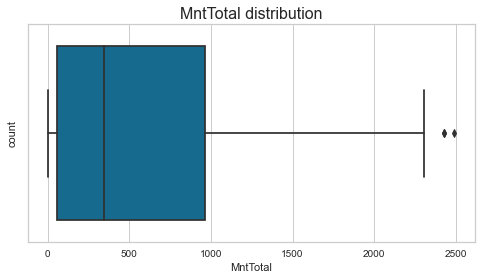

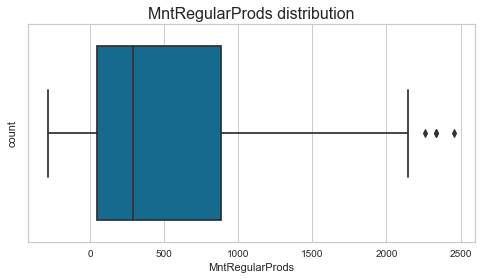

In [14]:
# Box plot for numerical variables
for i in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x=i)
    plt.title(str(i) + ' distribution', size=16)
    plt.ylabel('count')


<AxesSubplot:>

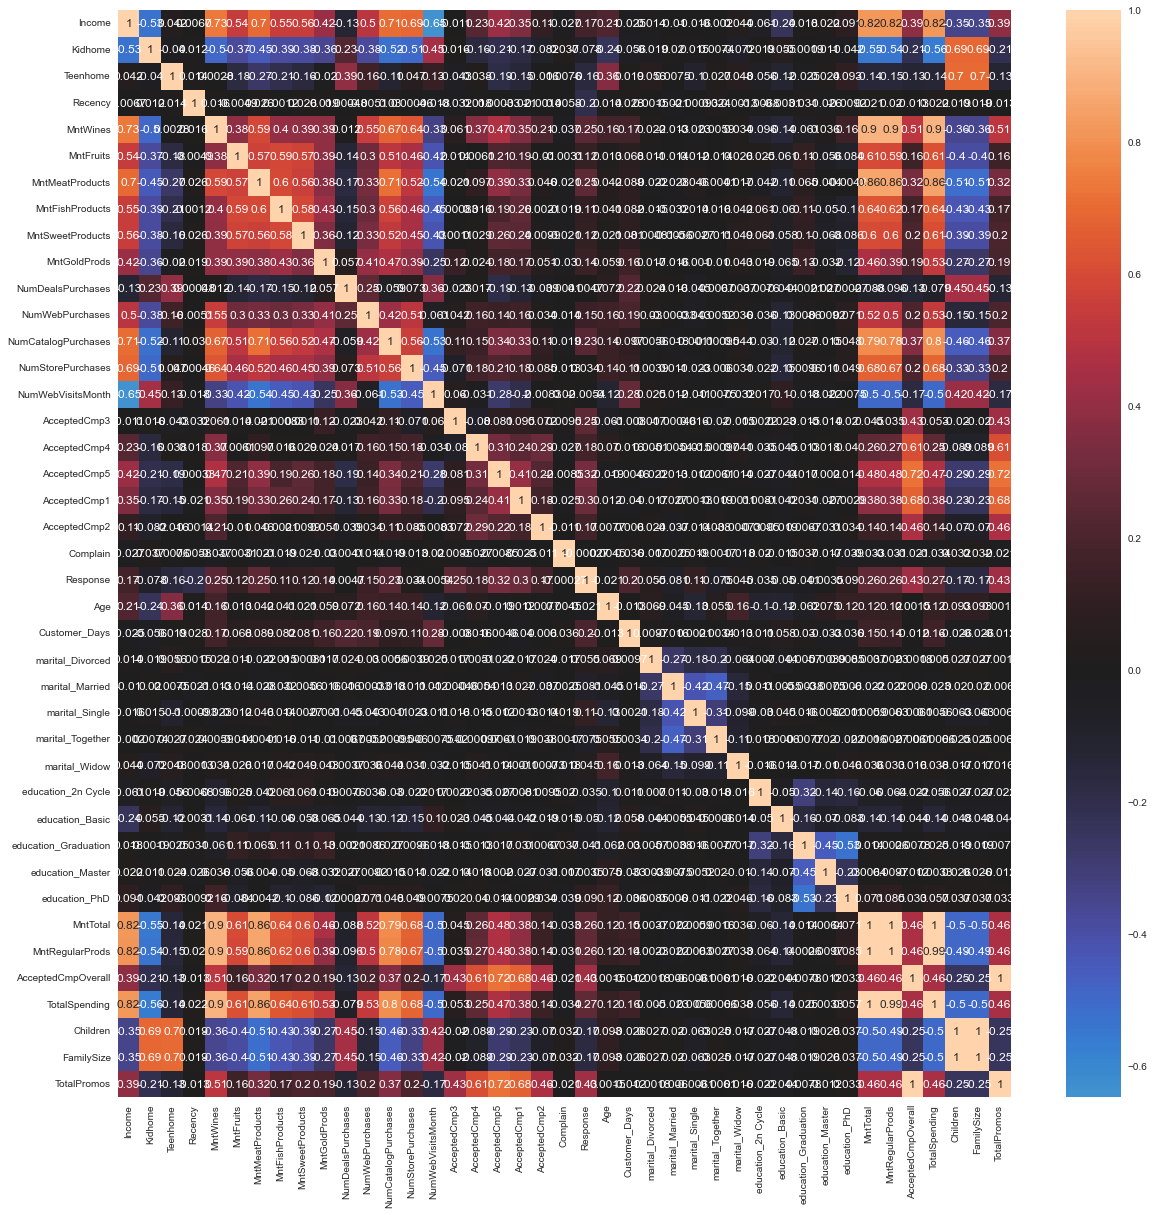

In [15]:
# Correlation matrix

corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True,center=0)

In [16]:
# Scaling

scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )

In [17]:
scaled_df.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,TotalSpending,Children,FamilySize,TotalPromos
0,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,2.628526,-0.562650,0.689203,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,2.370996,1.017189,1.527183,-0.341256,-0.795062,1.903324,-0.589047,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694,1.678056,1.665625,-0.439991,1.679323,-1.266589,-1.266589,-0.439991
1,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,-0.588043,-1.179732,-0.139645,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,1.273530,-1.188629,-0.341256,-0.795062,1.903324,-0.589047,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694,-0.940880,-0.909676,-0.439991,-0.963897,1.403420,1.403420,-0.439991
2,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,-0.230646,1.288596,-0.554069,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,0.333612,-0.205999,-0.341256,-0.795062,-0.525397,1.697658,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694,0.297384,0.312960,-0.439991,0.281242,-1.266589,-1.266589,-0.439991
3,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,-0.945440,-0.562650,0.274779,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,-1.289883,-1.060245,-0.341256,-0.795062,-0.525397,1.697658,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694,-0.893989,-0.859109,-0.439991,-0.920675,0.068415,0.068415,-0.439991
4,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,0.126750,0.054432,-0.139645,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,-1.033542,-0.951612,-0.341256,1.257763,-0.525397,-0.589047,-0.188938,-0.314093,-0.158444,-1.009570,-0.444656,1.905873,-0.270516,-0.228829,-0.439991,-0.307248,0.068415,0.068415,-0.439991
5,0.525918,-0.823405,0.906602,-1.141173,0.633742,0.392122,-0.309146,-0.688833,0.361655,-0.581101,-0.168834,0.693992,0.484147,1.288596,0.274779,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,0.162718,-0.299818,-0.341256,-0.795062,-0.525397,1.697658,-0.188938,-0.314093,-0.158444,-1.009570,2.248931,-0.524694,0.241809,0.305736,-0.439991,0.181498,0.068415,0.068415,-0.439991
6,0.193782,-0.823405,0.906602,-0.518886,-0.210910,0.970368,-0.006026,0.223372,0.531883,-0.329769,0.891792,1.059382,0.126750,0.362973,0.274779,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,-0.179071,1.181534,2.930351,-0.795062,-0.525397,-0.589047,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694,0.000409,0.031230,-0.439991,-0.027965,0.068415,0.068415,-0.439991
7,-0.877331,1.038757,-0.930767,-0.588029,-0.682136,-0.412394,-0.502041,-0.634101,-0.635399,-0.407102,-0.168834,-0.036788,-0.945440,-0.562650,1.103627,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,-1.375330,0.312475,-0.341256,1.257763,-0.525397,-0.589047,-0.188938,-0.314093,-0.158444,-1.009570,-0.444656,1.905873,-0.723793,-0.714632,-0.439991,-0.727836,0.068415,0.068415,-0.439991
8,-1.027174,1.038757,-0.930767,-1.037459,-0.865885,-0.663806,-0.649009,-0.634101,-0.586763,-0.813099,-0.699147,-0.402177,-0.945440,-1.179732,1.518051,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,2.370996,-0.435412,0.169277,-0.3

# Dimensionality Reduction using Principal Component Analysis

In [18]:
pca = PCA(n_components=0.95)
pca.fit(scaled_df)

PCA(n_components=0.95)

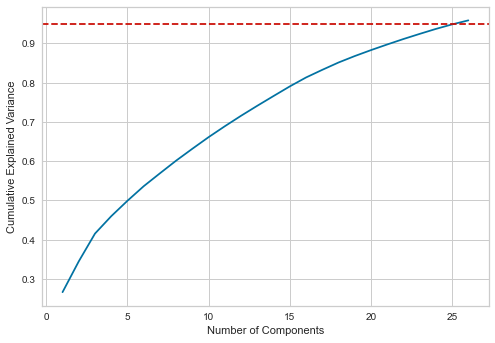

In [19]:
# get the cumulative sum of explained variances
cumulative_variances = np.cumsum(pca.explained_variance_ratio_)

# create the cumulative variance plot
plt.plot(range(1, pca.n_components_ + 1), cumulative_variances)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

In [20]:
# calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# find the index of the first element in cumulative_variance that is greater than or equal to 0.95
n_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components needed to retain at least 95% of variance: {n_components}")

Number of components needed to retain at least 95% of variance: 26


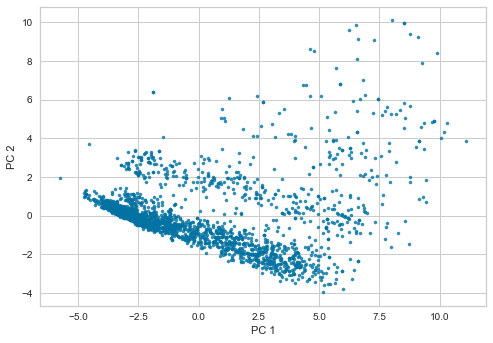

In [21]:
# Since we are eventually clustering we only take the first two principal components
# Plot the first two principal components as the x and y axes

pca = PCA(n_components = 2)
pca.fit(scaled_df)
X_pca = pca.fit_transform(scaled_df)

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, s=10)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

# K-Means Clustering 

C:\Users\priya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


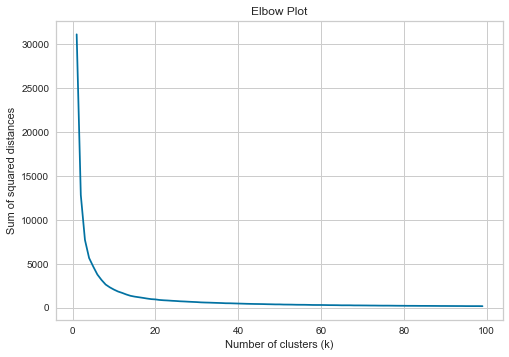

In [22]:
# Compute the sum of squared distances for each value of k
sse_PCA = []
for k2 in range(1, 100):
    kmeans2 = KMeans(n_clusters = k2, random_state=46)
    kmeans2.fit(X_pca)
    sse_PCA.append(kmeans2.inertia_)

# Plot the elbow plot
plt.plot(range(1, 100), sse_PCA, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Plot')
plt.show()

Elbow Method to determine the number of clusters to be formed:


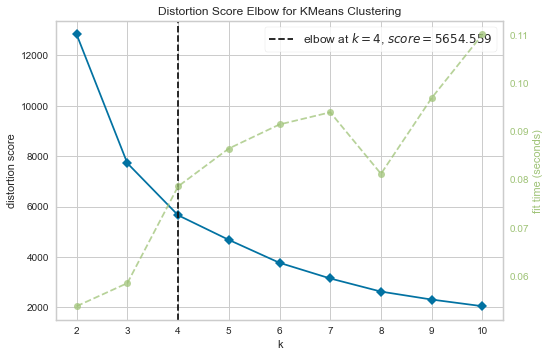

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# Although when we use the limit to be 100 clusters the elbow is found to be at k = 13 which is not practical 
# for us to use hence we take a cluster value which is less than 10

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_pca)
Elbow_M.show()

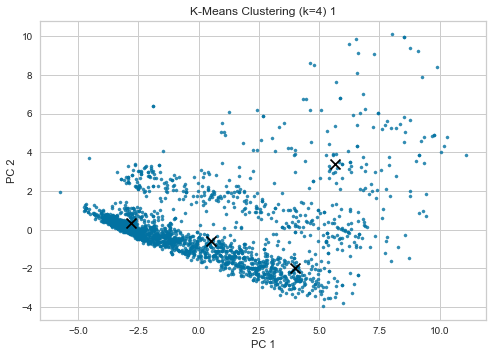

SSE:  5842.588580824876


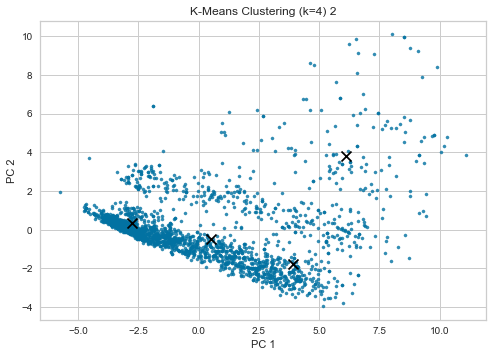

SSE:  5708.014208008505


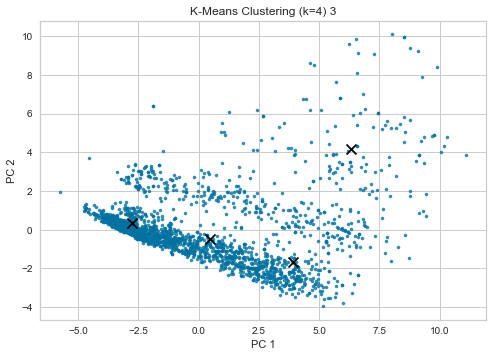

SSE:  5663.402055160572


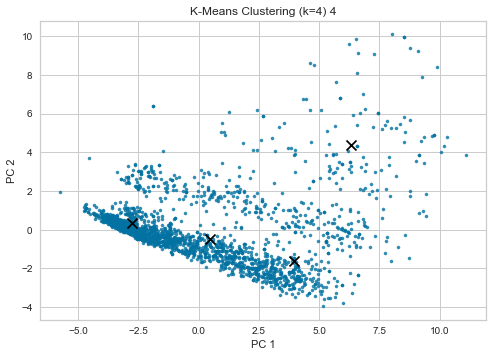

SSE:  5654.694268719554


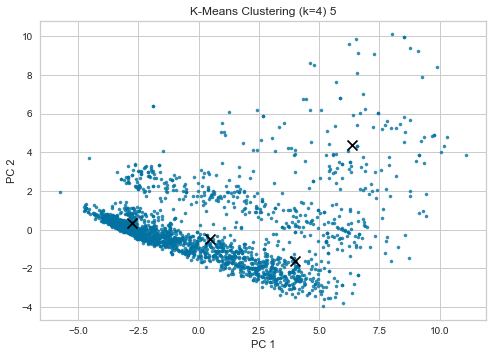

SSE:  5654.482795556268


In [24]:
X_pca_df = pd.DataFrame(X_pca)
X_pca_df2 = X_pca_df.rename(columns = {0: 'PC1', 1: 'PC2'})

for i in range(1,6):
    kmeans = KMeans(n_clusters=4, max_iter = i, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    kmeans.fit(X_pca_df2)
    labels = pd.Series(kmeans.labels_)
    kmeans_label = pd.concat([labels,X_pca_df2], axis=1)
    kmeans_label.rename(columns = {0: 'label'}, inplace= True)
    centers = pd.DataFrame(kmeans.cluster_centers_)
    plt.scatter(X_pca_df2['PC1'], X_pca_df2['PC2'],alpha=0.8, s=10)
    plt.scatter(centers[0], centers[1], color='black', marker='x', s=100)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title('K-Means Clustering (k=4) {}'.format(i))
    plt.show()
    print("SSE: ",kmeans.inertia_)

In [25]:
cluster = kmeans.fit_predict(X_pca)
df["Clusters"]= cluster

In [26]:
df["Clusters"].value_counts()

1    1082
3     522
0     459
2     142
Name: Clusters, dtype: int64

# Cluster Plots based on Spending, Promotions and Family Size

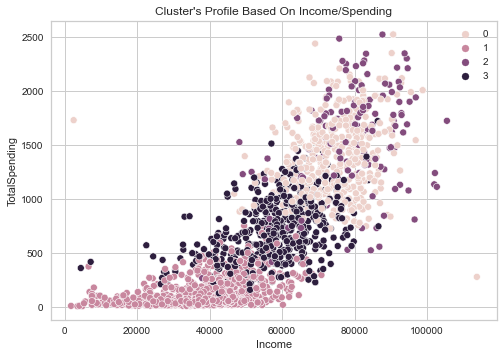

In [31]:
plot = sns.scatterplot(data = df,x=df["Income"], y=df["TotalSpending"],hue=df["Clusters"])
plot.set_title("Cluster's Profile Based On Income/Spending")
plt.legend()
plt.show()

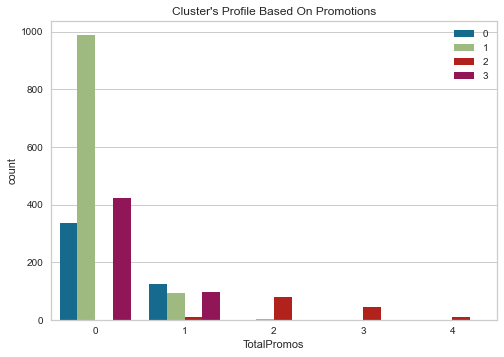

In [28]:
plot = sns.countplot(x=df["TotalPromos"],hue=df["Clusters"])
plot.set_title("Cluster's Profile Based On Promotions")
plt.legend()
plt.show()

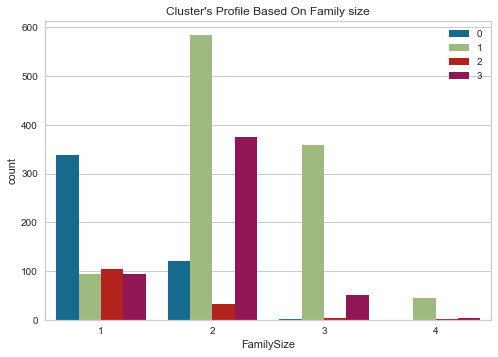

In [29]:
plot = sns.countplot(x=df["FamilySize"],hue=df["Clusters"])
plot.set_title("Cluster's Profile Based On Family size")
plt.legend()
plt.show()

 We can see from above cluster profiles that there are certain attributes unique to each cluster
 
 Cluster 0: Majorly a 2 member household; They have a average income and have average spending
 
 Cluster 1: Majorly a 2 member household; They have a lower income and have lower spending
 
 Cluster 2: Majorly a single member household; They have a higher income and have higher spending
 
 Cluster 3: Majorly a family consisting of 3-4 members; They have a average income and have lower spending
 
 Using this information we can tailor our marketing efforts!